# 상관분석

In [1]:
import pandas as pd

data = pd.read_csv('./dataset/ch5-1.csv')

data.head()

,chick_nm,weight,egg_weight,movement,food
0,a01,140,65,146,14
1,a02,128,62,153,12
2,a03,140,65,118,13
3,a04,135,65,157,13
4,a05,145,69,157,13


In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   chick_nm    30 non-null     object
 1   weight      30 non-null     int64 
 2   egg_weight  30 non-null     int64 
 3   movement    30 non-null     int64 
 4   food        30 non-null     int64 
dtypes: int64(4), object(1)
memory usage: 1.3+ KB


In [5]:
data_n = data.iloc[:, 1:]
data_n.head()

,weight,egg_weight,movement,food
0,140,65,146,14
1,128,62,153,12
2,140,65,118,13
3,135,65,157,13
4,145,69,157,13


In [6]:
data_n_correlation = data_n.corr(method='pearson')
data_n_correlation

,weight,egg_weight,movement,food
weight,1.000000,0.957169,0.380719,0.877574
egg_weight,0.957169,1.000000,0.428246,0.808147
movement,0.380719,0.428246,1.000000,0.319011
food,0.877574,0.808147,0.319011,1.000000


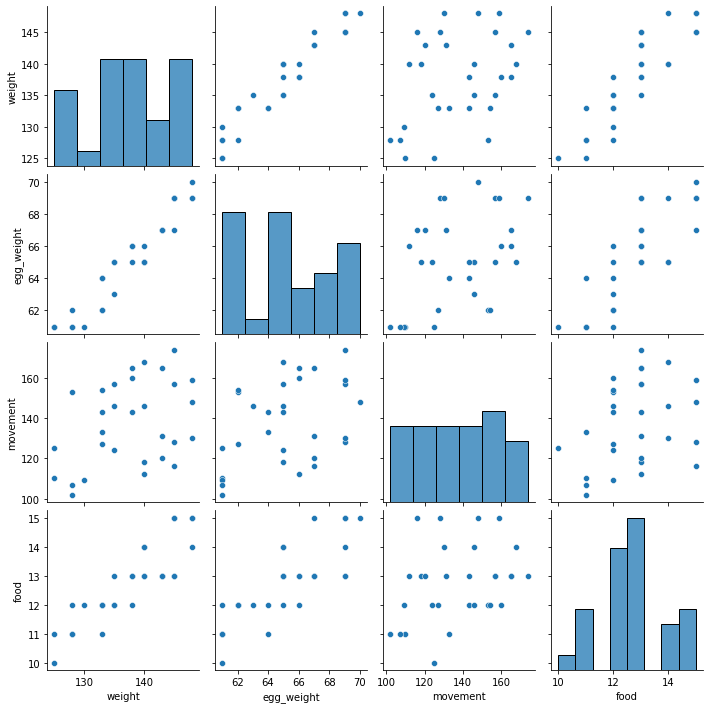

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

sns.pairplot(data_n)

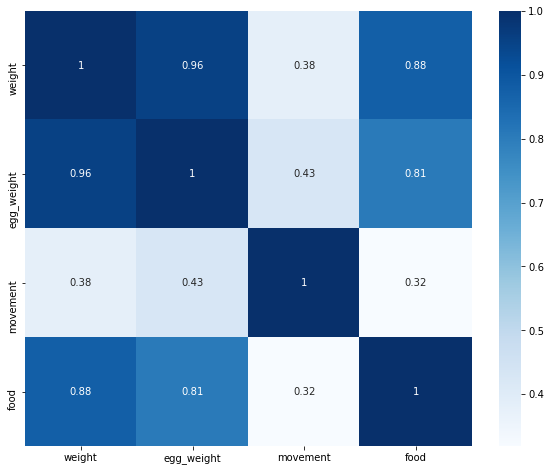

In [9]:
plt.figure(figsize=(10, 8))
sns.heatmap(data_n_correlation, annot=True, cmap='Blues')
plt.show()

# 회귀분석

## 단순선형회귀분석

In [12]:
# smf

import statsmodels.formula.api as smf

model_lm = smf.ols(formula='weight ~ egg_weight', data=data_n)

result_lm = model_lm.fit()
result_lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 weight   R-squared:                       0.916
Model:                            OLS   Adj. R-squared:                  0.913
Method:                 Least Squares   F-statistic:                     306.0
Date:                Fri, 15 Jul 2022   Prob (F-statistic):           1.32e-16
Time:                        02:50:54   Log-Likelihood:                -63.148
No. Observations:                  30   AIC:                             130.3
Df Residuals:                      28   BIC:                             133.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -14.5475      8.705     -1.671      0.106     -32.380       3.285
egg_weight     2.3371      0.134     17.493      0.000       2.063       2.611
==============================================================================
Omnibus:                       15.078   Durbin-Watson:                   1.998
Prob(Omnibus):                  0.001   Jarque-Bera (JB):                2.750
Skew:                           0.032   Prob(JB):                        0.253
Kurtosis:                       1.518   Cond. No.                     1.51e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.51e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [13]:
print(result_lm.summary())

                            OLS Regression Results                            
Dep. Variable:                 weight   R-squared:                       0.916
Model:                            OLS   Adj. R-squared:                  0.913
Method:                 Least Squares   F-statistic:                     306.0
Date:                Fri, 15 Jul 2022   Prob (F-statistic):           1.32e-16
Time:                        02:51:01   Log-Likelihood:                -63.148
No. Observations:                  30   AIC:                             130.3
Df Residuals:                      28   BIC:                             133.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -14.5475      8.705     -1.671      0.1

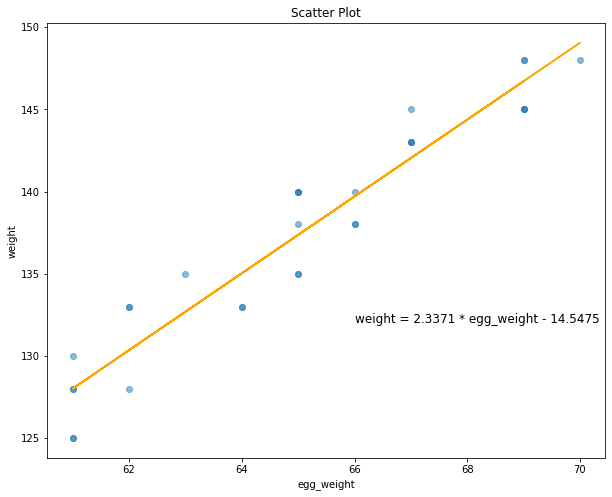

In [16]:
plt.figure(figsize=(10, 8))

plt.scatter(data_n.egg_weight, data_n.weight, alpha=.5)
plt.plot(data_n.egg_weight, data_n.egg_weight * 2.3371 - 14.5475, color='orange')
plt.text(66, 132, 'weight = 2.3371 * egg_weight - 14.5475', fontsize=12)
plt.title('Scatter Plot')
plt.xlabel('egg_weight')
plt.ylabel('weight')
plt.show()

잔차 5개 값: 
 0    2.633714
1   -2.354880
2    2.633714
3   -2.366286
4   -1.714829
dtype: float64


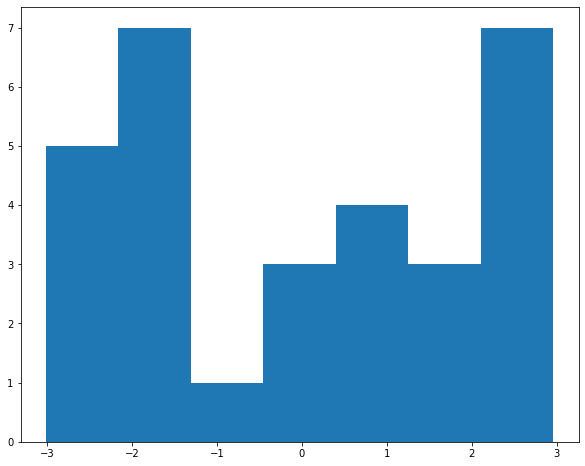

In [21]:
## 잔차 확인

print('잔차 5개 값: \n',result_lm.resid[:5])

plt.figure(figsize=(10, 8))
plt.hist(result_lm.resid, bins=7)
plt.show()


    - 잔차가 정규분포가 아님 

## 다중선형회귀분석

In [22]:
model_mlm = smf.ols(formula='weight ~ egg_weight + food + movement', data=data_n) # movement 유의하지 않음
result_mlm = model_mlm.fit()

result_mlm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 weight   R-squared:                       0.948
Model:                            OLS   Adj. R-squared:                  0.942
Method:                 Least Squares   F-statistic:                     157.7
Date:                Fri, 15 Jul 2022   Prob (F-statistic):           8.46e-17
Time:                        02:58:46   Log-Likelihood:                -56.008
No. Observations:                  30   AIC:                             120.0
Df Residuals:                      26   BIC:                             125.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9748      8.587      0.346      0.732     -14.676      20.626
egg_weight     1.7763      0.195      9.117      0.000       1.376       2.177
food           1.5847      0.405      3.915      0.001       0.753       2.417
movement      -0.0087      0.017     -0.522      0.606      -0.043       0.026
==============================================================================
Omnibus:                        1.993   Durbin-Watson:                   2.030
Prob(Omnibus):                  0.369   Jarque-Bera (JB):                1.746
Skew:                          -0.480   Prob(JB):                        0.418
Kurtosis:                       2.311   Cond. No.                     4.31e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.31e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [23]:
model_mlm = smf.ols(formula='weight ~ egg_weight + food', data=data_n) # movement 유의하지 않음
result_mlm = model_mlm.fit()

result_mlm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 weight   R-squared:                       0.947
Model:                            OLS   Adj. R-squared:                  0.943
Method:                 Least Squares   F-statistic:                     243.0
Date:                Fri, 15 Jul 2022   Prob (F-statistic):           5.44e-18
Time:                        02:59:52   Log-Likelihood:                -56.164
No. Observations:                  30   AIC:                             118.3
Df Residuals:                      27   BIC:                             122.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.6638      8.370      0.438      0.665     -13.510      20.837
egg_weight     1.7453      0.183      9.536      0.000       1.370       2.121
food           1.5955      0.399      4.001      0.000       0.777       2.414
==============================================================================
Omnibus:                        2.302   Durbin-Watson:                   2.103
Prob(Omnibus):                  0.316   Jarque-Bera (JB):                1.940
Skew:                          -0.502   Prob(JB):                        0.379
Kurtosis:                       2.263   Cond. No.                     1.84e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.84e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### 변수 선택

    - 전진선택법(Forward Selection) : y절편만 있는 모델부터 시작해 독립변수를 추가해 나감
    - 후진선택법(Backward Selection) : 독립변수를 모두 포함한 상태에서 가장 적은 영향을 주는 변수를 하나씩 제거해 나감
    - 단계적방법(Stepwise) : y절편만 있는 모델부터 시작해 독립변수를 추가해 나가지만 추가한 독립변수가 중요하지 않으면 제거하고, 다른 변수 추가해나감

## 다중공선성
    - 독립변수들간의 상관성
    - VIF (Variance Inflation Factor) : 분산팽창요인으로 확인할 수 있음
        - 10 이상이면 다중공선성 문제 있는 것

In [26]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

print(f"독립변수 이름 : {model_mlm.exog_names}")

vif1 = variance_inflation_factor(model_mlm.exog, 1) # 첫번쨰 변수 : egg_weight
vif2 = variance_inflation_factor(model_mlm.exog, 2) # 두번쨰 변수 : food

print(vif1, vif2)

독립변수 이름 : ['Intercept', 'egg_weight', 'food']
2.88268451130757 2.8826845113075756


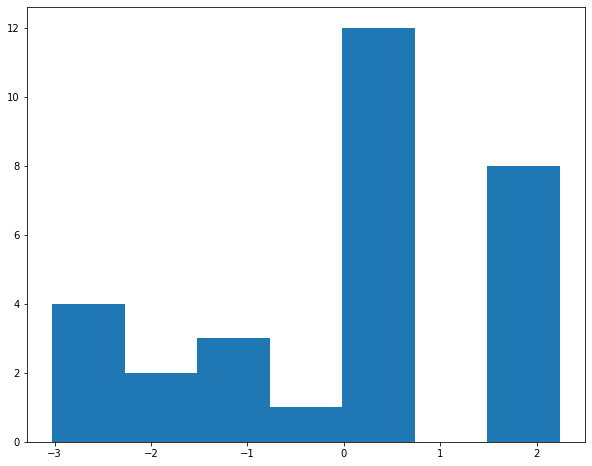

In [28]:
plt.figure(figsize=(10, 8))
plt.hist(result_mlm.resid, bins=7)
plt.show()

## 비선형 회귀분석

- Non-linear Regression Analysis : 독립변수와 종속변수가 선형관계가 아닐 떄 사용하는 회귀분석
- 곡선형태의 관계를 가질 수도 있기 때문에 이런 때에는 log또는 square 등을 해보며 적합한 모델 찾아야함

In [29]:
data2 = pd.read_csv('./dataset/ch5-2.csv')
data2.head()

,day,weight
0,1,43
1,2,55
2,3,69
3,4,86
4,5,104


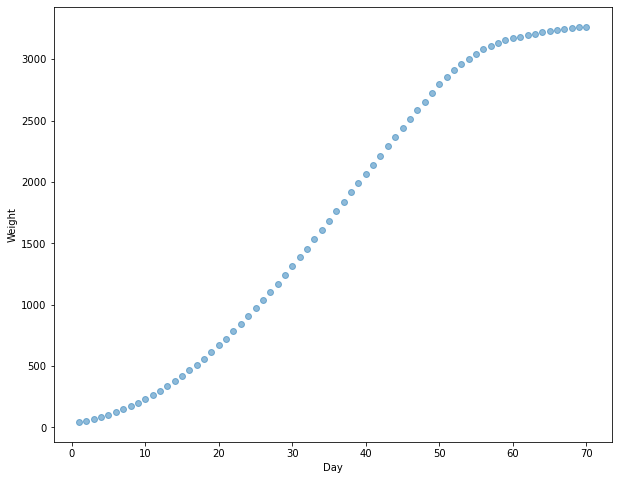

In [31]:
plt.figure(figsize=(10,8))
plt.scatter(data2.day, data2.weight, alpha=0.5)
plt.xlabel('Day')
plt.ylabel('Weight')
plt.show()

### 우선 선형회귀 

In [32]:
model_lm2 = smf.ols(formula='weight ~ day', data=data2)
result_lm2 = model_lm2.fit()

result_lm2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 weight   R-squared:                       0.979
Model:                            OLS   Adj. R-squared:                  0.979
Method:                 Least Squares   F-statistic:                     3189.
Date:                Fri, 15 Jul 2022   Prob (F-statistic):           7.22e-59
Time:                        03:09:31   Log-Likelihood:                -457.86
No. Observations:                  70   AIC:                             919.7
Df Residuals:                      68   BIC:                             924.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -295.8671     41.102     -7.198      0.000    -377.885    -213.850
day           56.8216      1.006     56.470      0.000      54.814      58.830
==============================================================================
Omnibus:                        3.866   Durbin-Watson:                   0.025
Prob(Omnibus):                  0.145   Jarque-Bera (JB):                2.079
Skew:                          -0.133   Prob(JB):                        0.354
Kurtosis:                       2.199   Cond. No.                         82.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

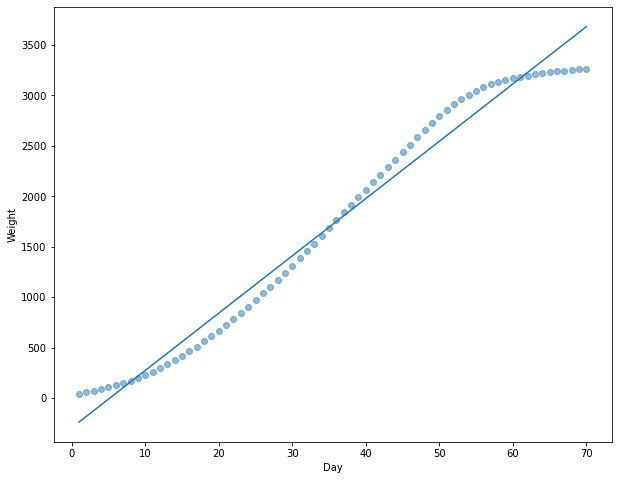

In [35]:
plt.figure(figsize=(10,8))
plt.scatter(data2.day, data2.weight, alpha=0.5)
plt.plot(data2.day, data2.day * 56.8216 - 295.8671)
plt.xlabel('Day')
plt.ylabel('Weight')
plt.show()

    - 3차 함수와 유사함을 알수있음. day를 3차식으로 만든다면 ????

In [36]:
model_nlm = smf.ols(formula='weight ~ I(day ** 3) + I(day ** 2) + day', data=data2)

result_nlm = model_nlm.fit()
result_nlm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 weight   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                 4.407e+04
Date:                Fri, 15 Jul 2022   Prob (F-statistic):          7.13e-109
Time:                        03:13:11   Log-Likelihood:                -327.17
No. Observations:                  70   AIC:                             662.3
Df Residuals:                      66   BIC:                             671.3
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept     117.0141     13.476      8.683      0.000      90.108     143.920
I(day ** 3)    -0.0253      0.000    -51.312      0.000      -0.026      -0.024
I(day ** 2)     2.6241      0.053     49.314      0.000       2.518       2.730
day           -15.2978      1.632     -9.373      0.000     -18.557     -12.039
==============================================================================
Omnibus:                        6.702   Durbin-Watson:                   0.082
Prob(Omnibus):                  0.035   Jarque-Bera (JB):                2.680
Skew:                           0.103   Prob(JB):                        0.262
Kurtosis:                       2.064   Cond. No.                     5.65e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.65e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

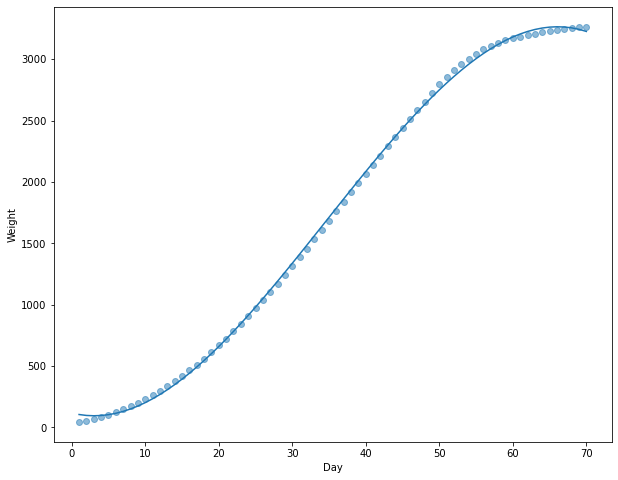

In [38]:
plt.figure(figsize=(10,8))
plt.scatter(data2.day, data2.weight, alpha=0.5)
plt.plot(data2.day, (data2.day ** 3)*(-0.0253) + (data2.day ** 2)*2.6241 + data2.day*-15.2978 + 117.0141)
plt.xlabel('Day')
plt.ylabel('Weight')
plt.show()